<a href="https://colab.research.google.com/github/ghhbdtn/telecom/blob/main/src/chap01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Упражнение 1.1

Прочитать пояснения и запустить примеры в https://colab.research.google.com/github/AllenDowney/ThinkDSP/blob/master/code/chap01.ipynb .

Ход работы:

По представленной ссылке была изучена работа примеров.


In [23]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py


# Упражнение 1.2 

Скачайте с сайта https://freesound.org/ обрзец звука, включающий музыку, речь или иные звуки, имеющие четко выраженную высоту. Выделите примерно полусекундный сегмент, в котором высота постоянна. Вычислите и распечатайте спектр выбранного сегмента. Как связанны тембр звука и гармоническая структура, видимая в спепктре?

Используйте high_pass, low_pass и band_stop для фильтрации тех или иных гармоник. Затем преобразуйте спектры обратно в сигнал и прослушайте его. Как звук соотносится с изменениями, сделанными в спектре?


In [123]:
if not os.path.exists('626107__d0tdashdialup__cowbell-beat.wav'):
    !wget https://github.com/ghhbdtn/telecom/blob/main/626107__d0tdashdialup__cowbell-beat.wav
     

В качестве исходного звука мною был выбран звук колокольчиков.

In [124]:
from thinkdsp import read_wave

wave = read_wave('626107__d0tdashdialup__cowbell-beat.wav')
wave.normalize()
wave.make_audio()


Посмотрим на график звука:

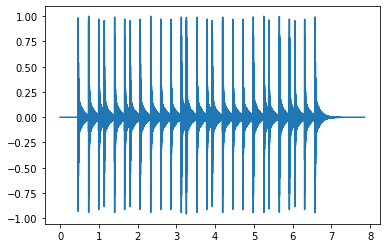

In [125]:
wave.plot()

Выделим в отдельный сегмент запись с 6.8с до 7.0с

In [142]:
segment = wave.segment(start=6.8, duration=0.2)
segment.make_audio()


Напечатаем выбранный сегмент:

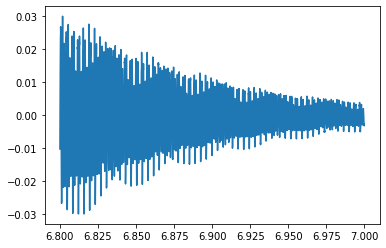

In [143]:
segment.plot()


Рассмотрим небольшой кусок выбранного сегмента:

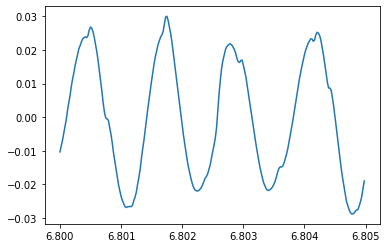

In [145]:
segment.segment(start=6.8, duration=0.005).plot()

Распечатаем спектр сегмента:

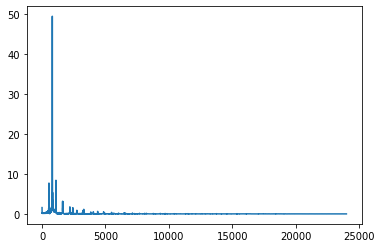

In [197]:
spectrum = segment.make_spectrum()
spectrum.plot()



Как мы видим звук локализован в первых 5000 ГЦ


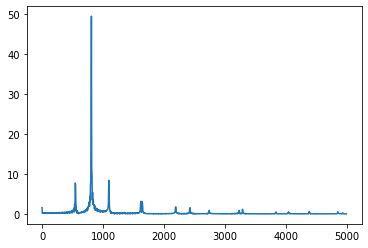

In [188]:
spectrum.plot(high = 5000)



Приблизим спектограмму до 2000:


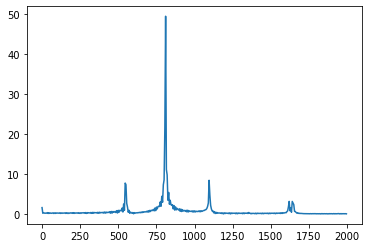

In [189]:


spectrum.plot(2000)
     




Рассмотрим пики спектра:


In [203]:

spectrum.peaks()[:10]

[(49.49548648856419, 810.0),
 (21.53200838686114, 805.0),
 (11.121588639070312, 815.0),
 (9.782462939256137, 820.0),
 (8.525246993539465, 800.0),
 (8.422804105536644, 1095.0),
 (7.725979941467696, 545.0),
 (7.3272174376867625, 550.0),
 (7.308692592896501, 795.0),
 (5.380755183797127, 830.0)]

Доминирующей частотой является 810Гц, так же есть другие пики: 545Гц и 1095Гц.

Тембр звука зависит не только от наличия в нём различных частотных тонов, но и от их соотношения по громкости и присутсвии или отсутсвии в спектре звучания основного тона.




Теперь используем high_pass, bass_pass и band_stop для фильтрации различных гармоник.


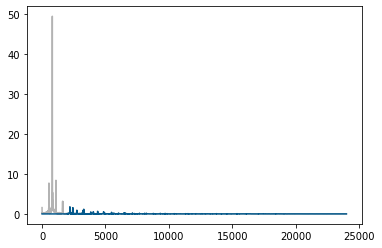

In [191]:
import matplotlib.pyplot as plt
from IPython.display import display

spectrum = segment.make_spectrum()
spectrum.plot(color='0.7')
spectrum.high_pass(2000)
spectrum.plot(color='#045a8d')
plt.show()

audio = spectrum.make_wave().make_audio()
display(audio)

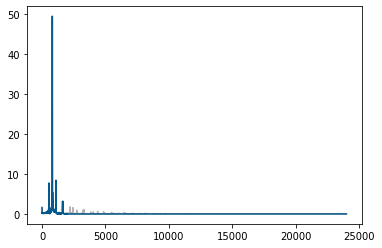

In [192]:


spectrum = segment.make_spectrum()
spectrum.plot(color='0.7')
spectrum.low_pass(2000)
spectrum.plot(color='#045a8d')
plt.show()

audio = spectrum.make_wave().make_audio()
display(audio)



Как видим звук стал приглушеннее и как будто бы хуже по качеству, что закономерно т.к. мы обрезали частоты, следовательно изменили форму сигнала, она стала проще, что сказывается на тембре и восприятии звука.

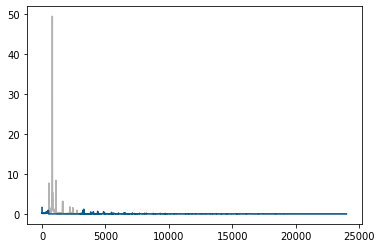

In [193]:


spectrum = segment.make_spectrum()
spectrum.plot(color='0.7')
spectrum.band_stop(500, 3000)
spectrum.plot(color='#045a8d')
plt.show()

audio = spectrum.make_wave().make_audio()
display(audio)





Как видно из графиков и слышно при прослушвании low_pass - срезал частоты ниже частоты среза, high_pass - срезал частоты выше частоты среза, а band_stop - срезал все частоты в указанной полосе частот.

low_pass - звучание приглушеннее в сравнении с исходным вариантом;
high_pass - звучанее более звонкое;
band_stop - звучанее очень глухое.


# Упражнение 1.3

Создайте сложный сигнал из объектов SinSignal и CosSignal суммируя их. Обработайте сигнал для получения wave и прослушайте его. Вычислите Spectrum и распечатайте. Что произойдёт при добавлении частотных компонент, не кратных основным?


Создадим сложный сигнал:

In [210]:


from thinkdsp import CosSignal, SinSignal
from IPython.display import Audio

cos_sig = (CosSignal(freq=440, amp=2.0, offset=0) +
           CosSignal(freq=880, amp=1.0, offset=0))
sin_sig = (SinSignal(freq=550, amp=0.5, offset=1.5) +
           SinSignal(freq=1100, amp=1.5, offset=1.5))

mix = sin_sig + cos_sig
wave = mix.make_wave(duration=2, start=0, framerate=11025)
wave.make_audio()



Напечатаем сигнал:

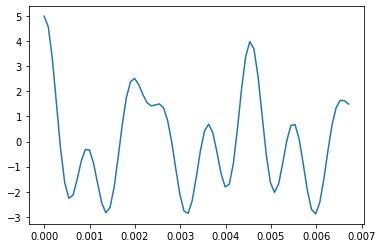

In [205]:


mix.plot()



Вычислим и напечатаем спектр данного сигнала:

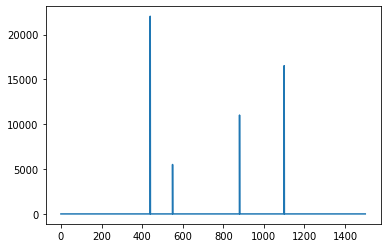

In [206]:


spectrum = wave.make_spectrum()
spectrum.plot(high=1500)



Попробуем добавить частоту не кратную основным:

In [223]:
mix += CosSignal(freq=770,amp=0.8,offset=0)
mix.make_wave().make_audio()

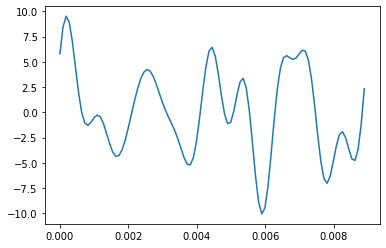

In [225]:
mix.plot()

После добавления некратной частоты, звук стал прерывистей и менее звонким.

#Упражнение 3

Напишите функцию stretch, берущую wave и коэффициент изменения. Она должна ускорять или замедлять сигнал изменением ts и framerate.


In [226]:


def stretch(wave, k):
  wave.ts /= k
  wave.framerate *= k
     


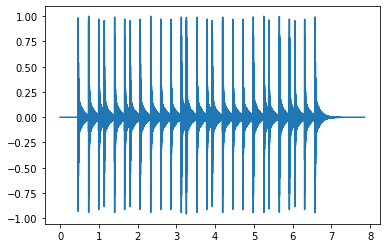

In [230]:
wave = read_wave('626107__d0tdashdialup__cowbell-beat.wav')
wave.plot()
wave.make_audio()



Ускорим в 2 раза


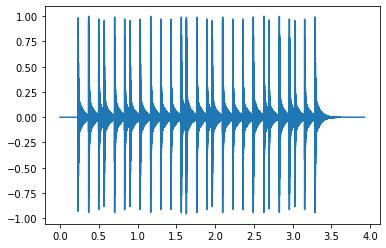

In [231]:


stretch(wave,2)
wave.plot()
wave.make_audio()
     




Замедлим нашу запись в полтора раза


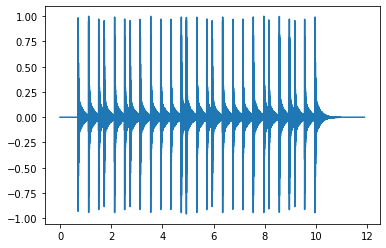

In [228]:

stretch(wave,0.66)
wave.plot()
wave.make_audio()
     